In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as numpy
import pandas as pd
import os


In [3]:
cars=pd.read_csv('CarPrice_Assignment.csv')
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
CompanyName = cars['CarName'].apply(lambda x: x.split(' ')[0])
cars.insert(3, 'CompanyName', CompanyName)
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
cars.CompanyName=cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [51]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange'],
      dtype='object')

In [52]:
cars['fueleconomy']=(0.55*cars['citympg'])+(0.45*cars['highwaympg'])

In [10]:
cars['price']=cars['price'].astype('int')
temp=cars.copy()
table=temp.groupby(['CompanyName'])['price'].mean()
temp=temp.merge(table.reset_index(),how='left',on='CompanyName')

In [11]:
bins=[0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']

In [12]:

cars['carsrange']=pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [53]:
cor=cars.corr()

ValueError: could not convert string to float: 'alfa-romeo'

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CompanyName       205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    object  
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

In [14]:
df1=cars.select_dtypes(exclude=['object','category'])

In [15]:
cor=df1.corr()
cor

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [16]:
correlated_features=set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j])>0.8:
            colname1=cor.columns[i]
            colname2=cor.columns[j]
            print(abs(cor.iloc[i,j]),"--",j,'--',colname1,'--',colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.874587475964264 -- 2 -- carlength -- wheelbase
0.8411182684818453 -- 3 -- carwidth -- carlength
0.8777284608306433 -- 3 -- curbweight -- carlength
0.8670324646791233 -- 4 -- curbweight -- carwidth
0.850594073426277 -- 6 -- enginesize -- curbweight
0.8097686545377302 -- 7 -- horsepower -- enginesize
0.8014561756662708 -- 11 -- citympg -- horsepower
0.9713370423425045 -- 13 -- highwaympg -- citympg
0.835305437204371 -- 6 -- price -- curbweight
0.8741451426986426 -- 7 -- price -- enginesize
0.8081381197889799 -- 11 -- price -- horsepower
0.9938444201653043 -- 13 -- fueleconomy -- citympg
0.9916921560568324 -- 14 -- fueleconomy -- highwaympg


In [17]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')
------
{'wheelbase', 'citympg', 'carlength', 'horsepower', 'enginesize', 'price', 'fueleconomy', 'highwaympg', 'curbweight', 'carwidth'}


In [18]:
cor['highwaympg']['citympg']

np.float64(0.9713370423425045)

In [19]:
corh = cars[list(correlated_features)].corr()


<Axes: >

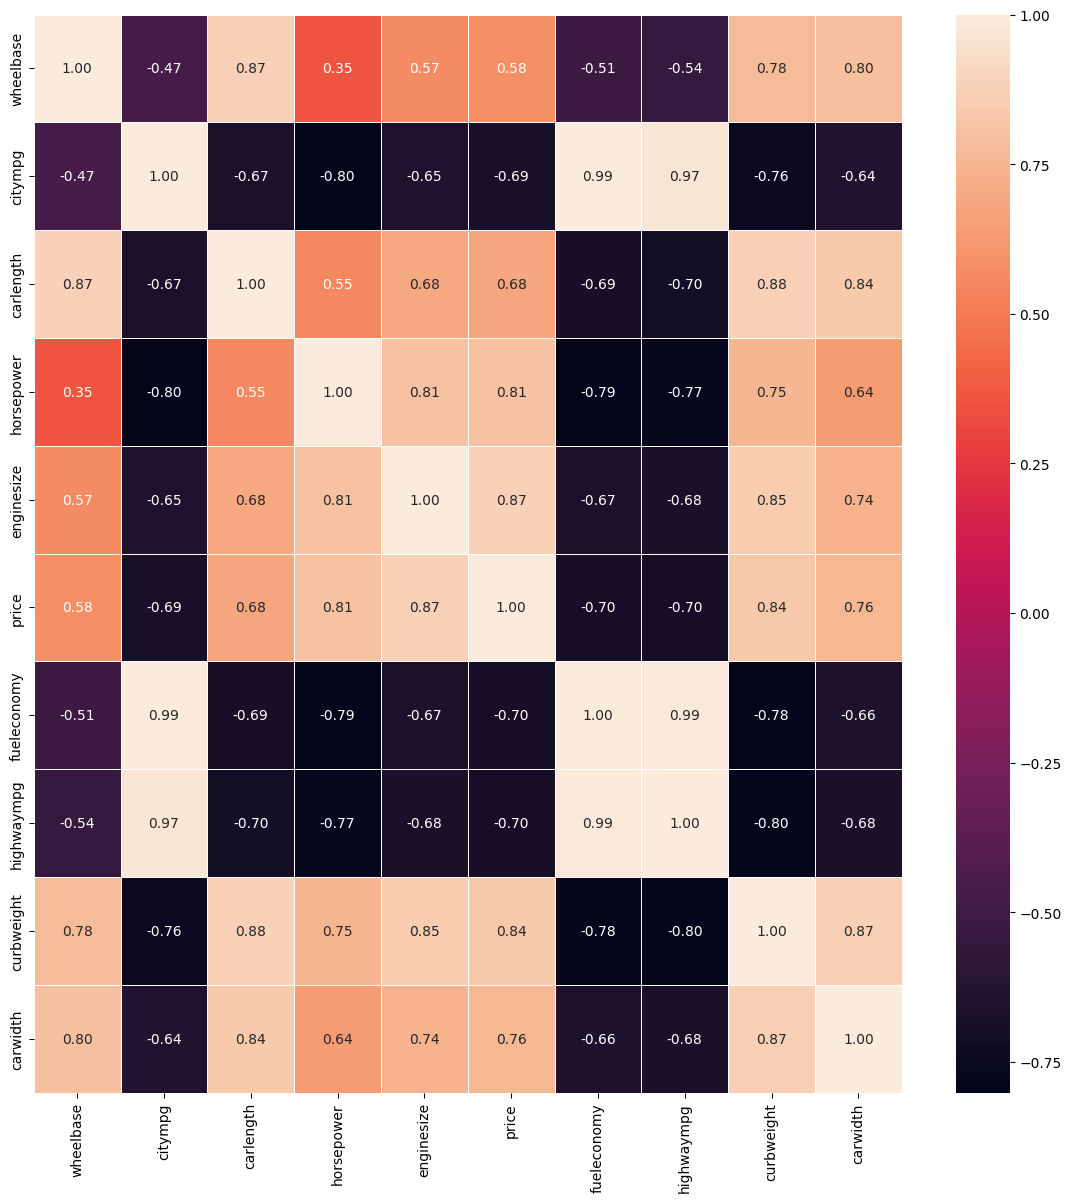

In [20]:
#produce a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
sns.heatmap(corh,annot=True, linewidths=0.5,fmt=".2f")

In [21]:
for i in cars.select_dtypes(include='object').columns:
    print(cars[i].unique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [22]:
#defining the map dunction

def dummies(x,df):
    temp=pd.get_dummies(df[x],drop_first=True,dtype=int)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df



In [23]:
for i in cars.select_dtypes(include='object').columns:
    print(cars[i].unique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [24]:
cars_lr=cars

In [25]:
#Applying the function to the cars_lr
for i in cars_lr.select_dtypes(include=['object','category']).columns:
    cars_lr=dummies(i,cars_lr)

In [26]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int64  
 16  fueleconomy       205 non-null    float64
 1

In [27]:
cars_lr.shape

(205, 69)

In [28]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0) #generate data sequence wise
df_train, df_test=train_test_split(cars_lr,train_size=0.7,test_size=0.3,random_state=100)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['wheelbase','carheight','stroke','curbweight','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,Highend
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0,1,0,0,0,0,0,0,0,0
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0,0,0,0,0,1,0,0,0,1
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0,0,0,0,0,1,0,0,0,0
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0,0,0,0,0,1,0,0,1,0
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0,0,0,0,0,1,0,0,1,0


In [31]:
y_train=df_train.pop('price')
x_train=df_train

In [32]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [34]:
def build_model(x,y):
    x=sm.add_constant(x)  #adding the constant
    lm=sm.OLS(y,x).fit()  #fitting the model
    print(lm.summary())   #model summary
    return lm

In [35]:
def checkKVIF(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values.i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    return(vif)

ols is a statistical model ols=ordinary least square

vif=variance inlation factor

In [36]:
model1 = build_model(x_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           3.34e-49
Time:                        12:18:58   Log-Likelihood:                 282.04
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                      84   BIC:                            -271.3
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4193      0.205  

In [37]:
lm=LinearRegression()
lm.fit(x_train,y_train)

rfe=RFE(estimator=lm, n_features_to_select=10)
rfe=rfe.fit(x_train,y_train)

In [38]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
rfe1=RFE(estimator=svr,n_features_to_select=15)
rfe1=rfe.fit(x_train,y_train)
x_train.columns[rfe1.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'bmw', 'rear', 'rotor', 'three', 'Highend'],
      dtype='object')

In [39]:
x_train.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'bmw', 'rear', 'rotor', 'three', 'Highend'],
      dtype='object')

In [40]:
rfe.support_

array([False, False, False, False,  True, False,  True,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True])

In [41]:
x_train.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueleconomy', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'gas', 'turbo', 'two', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'Medium',
       'Highend'],
      dtype='object')

##building a model using statsmodel for the detailed statistics , 0-false 1-true

In [42]:
x_train_rfe=x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,bmw,rear,rotor,three,Highend
122,0.291667,0.272692,0.139623,0.230159,0.083333,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,0.395833,0,0,0,0,1
166,0.308333,0.314973,0.139623,0.444444,0.266667,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,0.262500,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,0.475000,0,0,0,0,0


In [48]:
#create model using RFE returned features
model4=build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           3.49e-71
Time:                        12:22:53   Log-Likelihood:                 207.26
No. Observations:                 143   AIC:                            -392.5
Df Residuals:                     132   BIC:                            -359.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1234      0.018     -7.039      0.0

In [50]:
print(x_train_rfe.columns)


Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'bmw', 'rear', 'rotor', 'three', 'Highend'],
      dtype='object')


In [49]:
x_train_new = x_train_rfe.drop(["twelve"], axis = 1)

KeyError: "['twelve'] not found in axis"

In [44]:
df_test

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Medium,Highend
160,161,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,...,0,1,0,0,0,0,0,0,0,0
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,...,0,0,0,0,0,1,0,0,1,0
59,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,...,0,1,0,0,0,0,0,0,1,0
165,166,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,...,0,0,0,0,0,1,0,0,0,0
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,...,0,1,0,0,0,0,0,0,0,0
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,...,0,0,0,0,1,0,0,0,0,0
182,183,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,...,0,0,0,1,0,0,0,0,1,0
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#scaling the test set

num_vars=['carwidth','curbweight','enginesize','boreration','price','rotor','three','Highend','bmw','bear']
df_test=pd.DataFrame(scaler.fit_transform(df_test[num_vars]),columns=num_vars)

KeyError: "['boreration', 'bear'] not in index"